<h1><center>
    ECE 438: Digital Signal Processing with Applications<br/>
    Lab 11: Image Restoration<br/>
    <small>Date:</small><br/>
    <small>Section:</small><br>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 [---%]| | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Understanding of color images and color spaces (40 pts)**: *Python figures with color components, code (`ycbcr2rgb`), filtered images, questions*||||
|**Understanding of halftoning (60 pts)**: *Original and binary images with MSE, error images, table of MSE’s for filered and nonfiltered images, questions*||||

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 10)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<h3 style="color:red;"><left>Exercise 2.3: Color</left></h3>

**1. Load the image file ```girl.tif```. Check the size of array for this image by using the command ```print(image.shape)```, where ```image``` is the image matrix. Also, print the data type of this matrix.** 

Notice that this is a three dimensional array of type ```uint8```. It contains three gray scale image planes corresponding to the red, green, and blue components for each pixel. Since each color pixel is represented by three bytes, this is commonly known as a 24-bit image.

In [ ]:
# insert your code here


**2. Display the image. Note that ```cmap```, ```vmin```, ```vmax``` arguments are not needed.**

In [ ]:
# insert your code here


**3. Extract each of the color components, then plot each color component.**

Note that while the original is a color image, each color component separately is a monochrome image, so plotting each color component requires ```cmap```, ```vmin```, ```vmax``` arguments.

In [ ]:
# insert your code here


**4. Load the files ```ycbcr.npy``` using [`np.load()`](https://numpy.org/doc/stable/reference/generated/numpy.load.html), and print its type and data shape `dtype`.**

This file contains a NumPy array for a color image in $YC_bC_r$ format. The array contains three gray scale image planes that correspond to the luminance ($Y$) and two chrominance ($C_bC_r$) components.

In [ ]:
# insert your code here


**5. Plot each of the components.**

In [ ]:
# insert your code here


**6. Complete the function below that will perform the transformation of equation (2). It should accept a 3-D $YC_bC_r$ image array as input, and return a 3-D $RGB$ image array.**

* Make sure `ycbcr` is in `double` or `float` before any processing.
* After conversion, to make sure the values of `rgb` are in $[0,255]$, use [`np.clip()`](https://numpy.org/doc/stable/reference/generated/numpy.clip.html).

In [ ]:
def ycbcr2rgb(ycbcr):
    """
    Parameters
    ---
    ycbcr: image in YCbCr
    
    Returns
    ---
    rgb: image RGB
    """
    
    rgb = None
    return rgb

**7. Now, convert the ycbcr array to an RGB representation and display the color image.**

* Before displaying the image, make sure its data type is `np.uint8`.

In [ ]:
# insert your code here


**8. Load the file ```h.npy```. This is a $5 \times 5$ Gaussian filter with $\sigma^2=2.0$. (See the first week of the experiment for more details on this type of filter.)**

In [ ]:
# insert your code here


**9. Alter the ```ycbcr``` array by filtering only the luminance component, ```ycbcr[:,:,0]```, using the Gaussian filter (use `convolve2d()` function from last lab). Convert the result to RGB, and display it.**

* Instead of altering the original `ycbcr`, you can create a copy by `ycbcr1 = ycbcr.copy()`.

In [ ]:
def convolve2d(image, kernel):
    """
    Parameters
    ---
    image: the input image
    kernel: the filter
    
    Returns
    ---
    filtered: the filtered image
    """
    filtered = None
    return filtered

In [ ]:
# insert your code here


**10. Now alter `ycbcr` by filtering both chrominance components, ```ycbcr[:,:,1]``` and ```ycbcr[:,:,2]```, using the Gaussian filter. Convert this result to RGB, and display it.**

* Again, instead of altering the original `ycbcr`, you can create a copy by `ycbcr2 = ycbcr.copy()`.

In [ ]:
# insert your code here


### Spatial Filtering

#### Introduction to Spatial Filtering
Spatial filtering is a process used to enhance or restore images by manipulating pixel values in a local neighborhood. In this experiment, we will use spatial filtering to restore images affected by **pepper noise** (random black pixels) and **salt noise** (random white pixels).

One effective filter for this type of noise is the **median filter**. The **median filter** is a type of order-statistic filter that replaces the value of a pixel with the **median** value of its neighboring pixels. This is particularly effective for removing salt-and-pepper noise without significantly blurring the edges of the image.

Another effective approach is using **max and min filters**, which can handle pepper and salt noise individually:
- **Max Filter** is effective in reducing **pepper noise** by taking the maximum value within a local neighborhood, which helps to replace black pixels with brighter surrounding values.
- **Min Filter** is effective in reducing **salt noise** by taking the minimum value within a local neighborhood, which helps to replace white pixels with darker surrounding values.

#### Principle of Spatial Filtering
To remove salt or pepper noise, we use spatial filters that smooth the image by averaging or taking other statistical measures of neighboring pixel values.

- **Median Filter**:
  $$ f_{\text{median}}(x, y) = \text{median} \{ g(r, c) \}, \quad (r, c) \in S_{xy} $$
  Where $ S_{xy} $ represents the neighborhood around the pixel at position $ (x, y) $, and $ g(r, c) $ are the intensity values of pixels within the neighborhood. The median filter is particularly effective for removing salt or pepper noise without significantly blurring the edges of the image.

- **Max Filter**:
  $$ f_{\text{max}}(x, y) = \max \{ g(r, c) \}, \quad (r, c) \in S_{xy} $$
  The max filter replaces each pixel value with the maximum value from its neighborhood. This is useful for removing pepper noise.

- **Min Filter**:
  $$ f_{\text{min}}(x, y) = \min \{ g(r, c) \}, \quad (r, c) \in S_{xy} $$
  The min filter replaces each pixel value with the minimum value from its neighborhood. This is useful for removing salt noise.

#### Student Task
1. **Apply spatial filters** (max filter and min filter) to given noisy images that are affected by **pepper noise** and **salt noise** separately.
2. Compare the results of the filters to determine which one works better for removing each type of noise while preserving details.


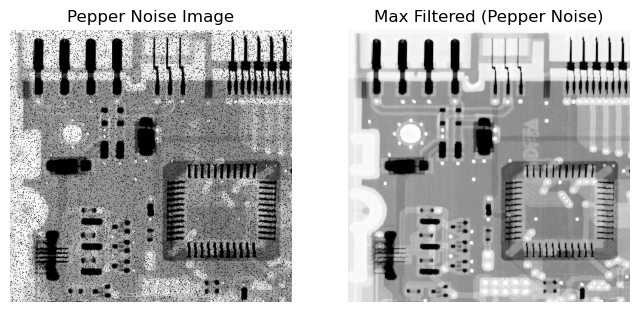

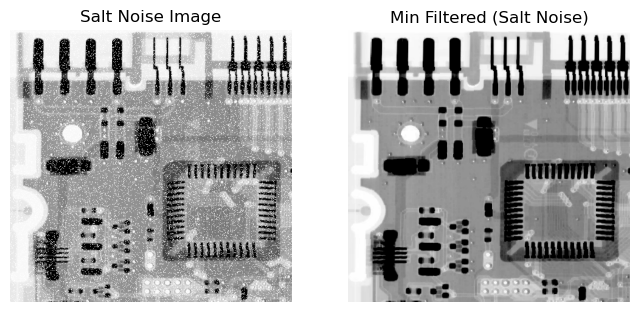

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply max filter
def max_filter(image, kernel_size=3):
    # insert your code here. Hint: check cv2.dilate()
    return None


# Function to apply min filter
def min_filter(image, kernel_size=3):
    # insert your code here. Hint: check cv2.erode()
    return None

# Read and filter the images
pepper_noise_image = cv2.imread('circuitboard-pepper.tif', cv2.IMREAD_GRAYSCALE)
max_filtered_pepper = max_filter(pepper_noise_image, kernel_size=3)

salt_noise_image = cv2.imread('circuitboard-salt.tif', cv2.IMREAD_GRAYSCALE)
min_filtered_salt = min_filter(salt_noise_image, kernel_size=3)

# Display the images before and after filtering
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Pepper Noise Image')
plt.axis('off')
plt.imshow(pepper_noise_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Max Filtered (Pepper Noise)')
plt.axis('off')
plt.imshow(max_filtered_pepper, cmap='gray')
plt.show()

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Salt Noise Image')
plt.axis('off')
plt.imshow(salt_noise_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Min Filtered (Salt Noise)')
plt.imshow(min_filtered_salt, cmap='gray')
plt.axis('off')
plt.show()

### Experiment: Adaptive Median Filtering

#### Introduction to Adaptive Median Filtering
The filters discussed previously, such as median, max, and min filters, are effective but do not adapt to the varying characteristics of the image. In some cases, using an **adaptive median filter** can improve results by adjusting the filtering based on local image characteristics. The **adaptive median filter** works by changing the size of the neighborhood used for filtering until specific conditions are met. This makes it effective for images with high-density salt-and-pepper noise.

#### Principle of Adaptive Median Filtering
In adaptive median filtering, the process starts with a small neighborhood size $ S_{xy} $ centered at the pixel being processed. The algorithm uses two levels of processing for each pixel to decide whether it should be replaced or retained. The conditions are as follows:

- **Level A**:
  - If $ z_{\text{min}} < z_{\text{med}} < z_{\text{max}} $, go to **Level B**.
  - Else, increase the size of $ S_{xy} $.
    - If $ S_{xy} \leq S_{\text{max}} $, repeat **Level A**.
    - Else, output $ z_{\text{med}} $.
- **Level B**:
  - If $ z_{\text{min}} < z_{xy} < z_{\text{max}} $, output $ z_{xy} $.
  - Else, output $ z_{\text{med}} $.

Where:
- $ z_{\text{min}} $: Minimum intensity value in $ S_{xy} $.
- $ z_{\text{max}} $: Maximum intensity value in $ S_{xy} $.
- $ z_{\text{med}} $: Median of intensity values in $ S_{xy} $.
- $ z_{xy} $: Intensity value at coordinates $(x, y)$.
- $ S_{\text{max}} $: Maximum allowed size of $ S_{xy} $.

#### Student Task
1. **Add salt-and-pepper noise** to a given image with salt-and-pepper noise (probability = 0.25).
2. **Apply adaptive median filtering** to the noisy image.
3. Compare the result of adaptive median filtering with traditional median filtering to determine which one works better for high-density noise while preserving details.


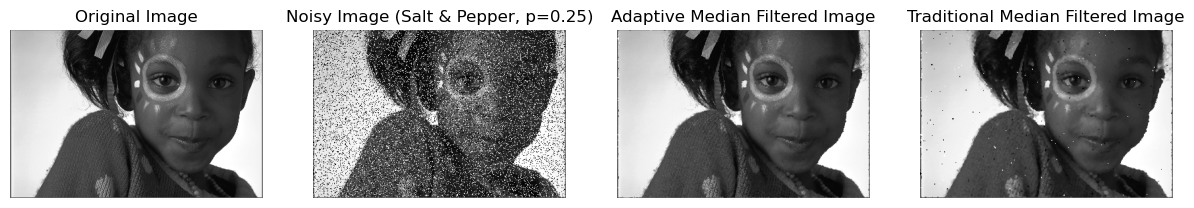

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to add salt-and-pepper noise to an image
def add_salt_pepper_noise(image, prob=0.25):
    noisy_image = image.copy()
    num_salt = np.ceil(prob * image.size * 0.5)
    num_pepper = np.ceil(prob * image.size * 0.5)
    
    salt_coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]    
    pepper_coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    
    # insert your code here to add salt and pepper noise to the images according to the coordinates
    noisy_image = None
    
    return noisy_image

# Function to apply adaptive median filter
def adaptive_median_filter(image, S_max=7):
    output_image = image.copy()
    rows, cols = image.shape
    
    for i in range(rows):
        for j in range(cols):
            S_xy = 3
            while S_xy <= S_max:
                r_min = max(i - S_xy // 2, 0)
                r_max = min(i + S_xy // 2 + 1, rows)
                c_min = max(j - S_xy // 2, 0)
                c_max = min(j + S_xy // 2 + 1, cols)
                
                neighborhood = image[r_min:r_max, c_min:c_max]
                z_xy = image[i, j]
                
                # insert your code here. Hint: Calculate z_min, z_max, and z_med using neighborhood values
                z_min = None
                z_max = None
                z_med = None
                
                # insert your code here. Hint: assign correct values for output_image according to the above instructions
                if z_min < z_med < z_max:
                    if z_min < z_xy < z_max:
                        output_image[i, j] = None
                    else:
                        output_image[i, j] = None
                    break
                else:
                    S_xy += 2
                    if S_xy > S_max:
                        output_image[i, j] = None
    
    return output_image

def median_filter(image, kernel_size=3):
    # insert your code here. Hint: check cv2.medianBlur().
    return None

original_image = cv2.imread('girl.tif', cv2.IMREAD_GRAYSCALE)
salt_pepper_noise_image = add_salt_pepper_noise(original_image, prob=0.25)
adaptive_filtered_image = adaptive_median_filter(salt_pepper_noise_image, S_max=7)
traditional_median_filtered_image = median_filter(salt_pepper_noise_image, 3)

# Display original, noisy, and filtered images
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(original_image, cmap='gray')

plt.subplot(1, 4, 2)
plt.title('Noisy Image (Salt & Pepper, p=0.25)')
plt.axis('off')
plt.imshow(salt_pepper_noise_image, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Adaptive Median Filtered Image')
plt.axis('off')
plt.imshow(adaptive_filtered_image, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Traditional Median Filtered Image')
plt.axis('off')
plt.imshow(traditional_median_filtered_image, cmap='gray')
plt.show()

### Evaluation with MSE and PSNR

#### Introduction to Image Quality Evaluation
In image processing, it’s important to assess how well filtering methods retain the quality of the original image while removing noise. Two commonly used metrics for this purpose are **Mean Squared Error (MSE)** and **Peak Signal-to-Noise Ratio (PSNR)**.

- **Mean Squared Error (MSE)**: MSE measures the average squared difference between the original and filtered images. A lower MSE value indicates a closer match to the original image, meaning the filter was effective in maintaining image quality.
  
  $$
  \text{MSE} = \frac{1}{mn} \sum_{x=1}^{m} \sum_{y=1}^{n} [I_{\text{original}}(x, y) - I_{\text{filtered}}(x, y)]^2
  $$

  where \( m \) and \( n \) are the image dimensions, \( I_{\text{original}} \) is the pixel value in the original image, and \( I_{\text{filtered}} \) is the corresponding pixel value in the filtered image.

- **Peak Signal-to-Noise Ratio (PSNR)**: PSNR, often expressed in decibels (dB), is based on the MSE but provides a standardized scale to evaluate image quality. A higher PSNR value indicates better image quality and less distortion from the original.

  $$
  \text{PSNR} = 20 \cdot \log_{10} \left( \frac{\text{MAX}_{I}}{\sqrt{\text{MSE}}} \right)
  $$

  where \( \text{MAX}_{I} \) is the maximum possible pixel value in the image (typically 255 for an 8-bit grayscale image).

#### Principle of Quality Metrics
- **MSE** helps us understand the average discrepancy between the original and filtered images. A low MSE value indicates high similarity, which is desirable for preserving image quality.
- **PSNR** gives us a standardized measure of quality; the higher the PSNR, the better the filter retained details while reducing noise.

#### Student Task
1. **Implement MSE and PSNR**: Write code to compute MSE and PSNR between the original and filtered images.
2. **Apply Evaluation Metrics**: Calculate MSE and PSNR for each filter you implemented (max filter, min filter, adaptive median filter, and traditional median filter).
3. **Analyze the Results**: Based on the calculated MSE and PSNR values, analyze and compare the performance of each filter. Which filter achieved the lowest MSE and highest PSNR, indicating effective noise removal with minimal loss of detail?


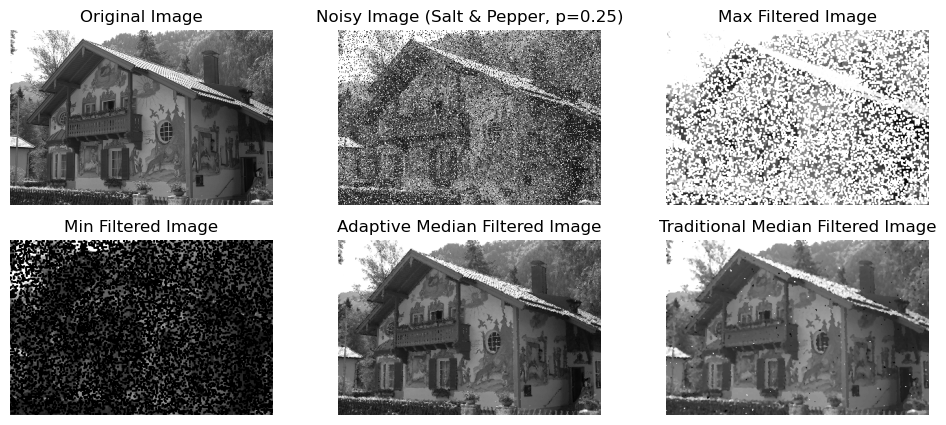

Max Filter - MSE: 87.64, PSNR: 28.70
Min Filter - MSE: 90.05, PSNR: 28.59
Adaptive Median Filter - MSE: 16.98, PSNR: 35.83
Traditional Median Filter - MSE: 41.83, PSNR: 31.92


In [3]:
import cv2
import numpy as np

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(original_image, filtered_image):
    # insert your code here. Hint: use numpy matrix calculation for the above formula.
    mse = None
    return mse

# Function to calculate Peak Signal-to-Noise Ratio (PSNR)
def calculate_psnr(original_image, filtered_image):
    # insert your code here. Hint: return float('inf') if MSE equals to 0.
    psnr = None
    return psnr

# Calculate MSE and PSNR for each filtered image

original_image = cv2.imread('house.tif', cv2.IMREAD_GRAYSCALE)
salt_pepper_noise_image = add_salt_pepper_noise(original_image, prob=0.25)

max_filtered_image = max_filter(salt_pepper_noise_image, kernel_size=3)
min_filtered_image = min_filter(salt_pepper_noise_image, kernel_size=3)
adaptive_filtered_image = adaptive_median_filter(salt_pepper_noise_image, S_max=7)
traditional_median_filtered_image = median_filter(salt_pepper_noise_image, 3)

mse_max_filter = calculate_mse(original_image, max_filtered_image)
psnr_max_filter = calculate_psnr(original_image, max_filtered_image)

mse_min_filter = calculate_mse(original_image, min_filtered_image)
psnr_min_filter = calculate_psnr(original_image, min_filtered_image)

mse_adaptive_median = calculate_mse(original_image, adaptive_filtered_image)
psnr_adaptive_median = calculate_psnr(original_image, adaptive_filtered_image)

mse_traditional_median = calculate_mse(original_image, traditional_median_filtered_image)
psnr_traditional_median = calculate_psnr(original_image, traditional_median_filtered_image)


# Display original, noisy, and filtered images
plt.figure(figsize=(12, 5))
plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(original_image, cmap='gray')

plt.subplot(2, 3, 2)
plt.title('Noisy Image (Salt & Pepper, p=0.25)')
plt.axis('off')
plt.imshow(salt_pepper_noise_image, cmap='gray')

plt.subplot(2, 3, 3)
plt.title('Max Filtered Image')
plt.axis('off')
plt.imshow(max_filtered_image, cmap='gray')

plt.subplot(2, 3, 4)
plt.title('Min Filtered Image')
plt.axis('off')
plt.imshow(min_filtered_image, cmap='gray')

plt.subplot(2, 3, 5)
plt.title('Adaptive Median Filtered Image')
plt.axis('off')
plt.imshow(adaptive_filtered_image, cmap='gray')

plt.subplot(2, 3, 6)
plt.title('Traditional Median Filtered Image')
plt.axis('off')
plt.imshow(traditional_median_filtered_image, cmap='gray')

plt.show()

# Print MSE and PSNR values for comparison
print(f"Max Filter - MSE: {mse_max_filter:.2f}, PSNR: {psnr_max_filter:.2f}")
print(f"Min Filter - MSE: {mse_min_filter:.2f}, PSNR: {psnr_min_filter:.2f}")
print(f"Adaptive Median Filter - MSE: {mse_adaptive_median:.2f}, PSNR: {psnr_adaptive_median:.2f}")
print(f"Traditional Median Filter - MSE: {mse_traditional_median:.2f}, PSNR: {psnr_traditional_median:.2f}")
